In [3]:
!pip install pandas numpy matplotlib seaborn scikit-learn joblib

--- Script execution started. Output is being logged to script_output.txt and console ---
--- Plots will be saved in the 'output_plots' directory ---
Step 1: Data Loading and Initial Inspection
'bank-additional.csv' loaded successfully.
First 5 rows of the dataset:
   age          job  marital          education default  housing     loan  \
0   30  blue-collar  married           basic.9y      no      yes       no   
1   39     services   single        high.school      no       no       no   
2   25     services  married        high.school      no      yes       no   
3   38     services  married           basic.9y      no  unknown  unknown   
4   47       admin.  married  university.degree      no      yes       no   

     contact month day_of_week  ...  campaign  pdays  previous     poutcome  \
0   cellular   may         fri  ...         2    999         0  nonexistent   
1  telephone   may         fri  ...         4    999         0  nonexistent   
2  telephone   jun         wed  ..

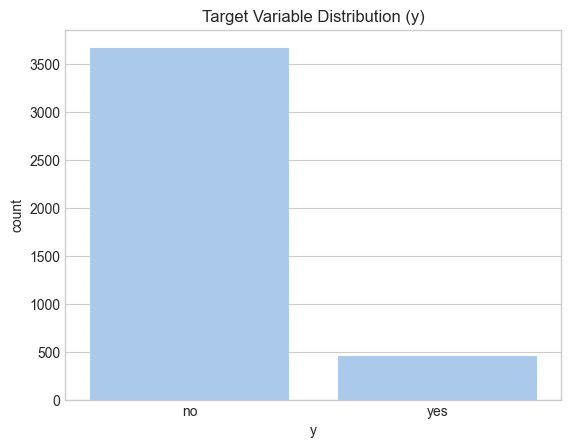


Step 2: Data Cleaning and Exploratory Data Analysis

Missing data counts (as NaN):
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

Categorical columns containing 'unknown' and their ratios:
Column: job, Unknown Count: 39, Ratio: 0.95%
Column: marital, Unknown Count: 11, Ratio: 0.27%
Column: education, Unknown Count: 167, Ratio: 4.05%
Column: default, Unknown Count: 803, Ratio: 19.50%
Column: housing, Unknown Count: 105, Ratio: 2.55%
Column: loan, Unknown Count: 105, Ratio: 2.55%

Plot saved: output_plots\02_numerical_features_boxplots.png


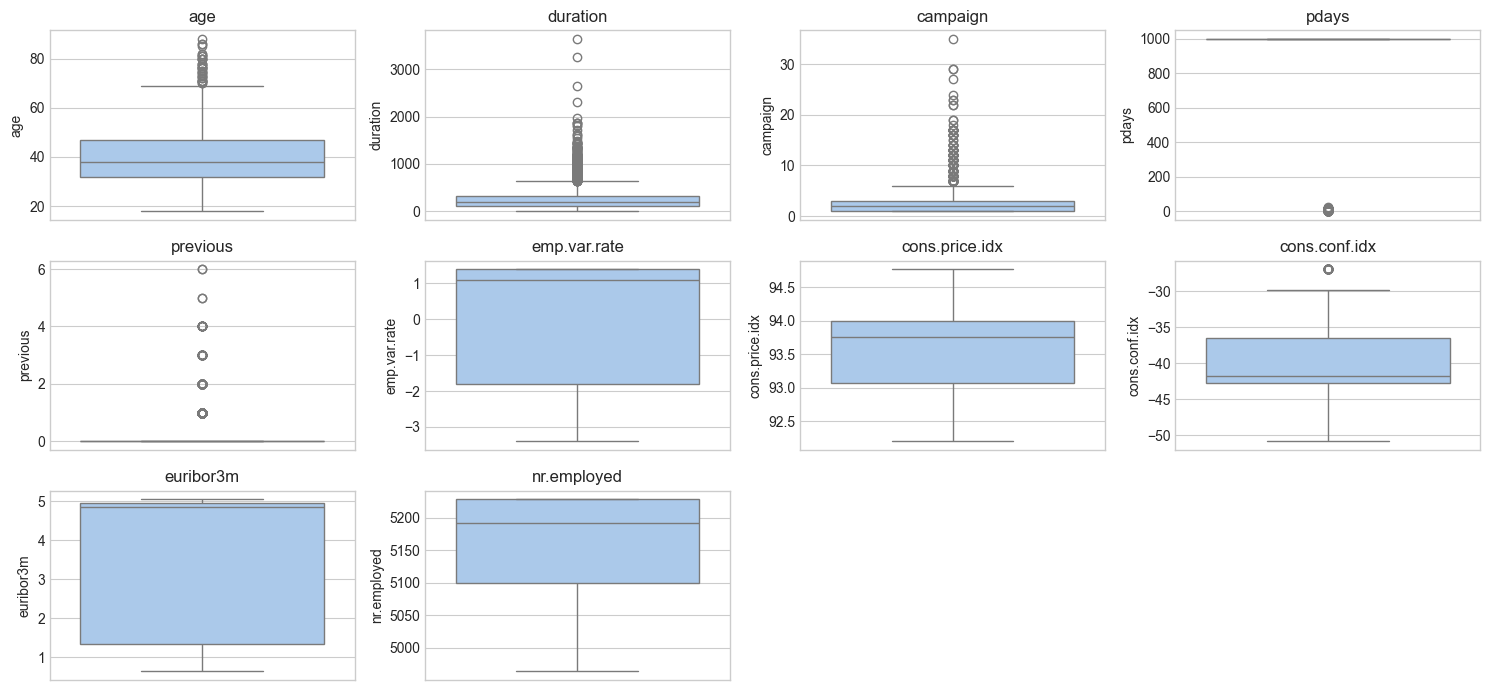


Target variable 'y' converted to numerical form (0: no, 1: yes).

Step 3: Data Preprocessing

Categorical features (10): ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
Numerical features (10): ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

Training set size: (3089, 20), Test set size: (1030, 20)

Number of features after preprocessing: 53

Step 4: Feature Engineering and Selection
Reviewing model training methods: Balanced class weights, stratified cross-validation, hyperparameter tuning, and various metrics will be used.
If there are specific requirements in the PDF (e.g., 'duration' column, custom feature engineering), they should be implemented in the relevant parts of the code.

Step 5: Model Selection and Comparison

Training Logistic Regression...
Logistic Regression Performance:
  Accuracy (Train): 0.8728
  Accuracy (Test): 0.8670
 

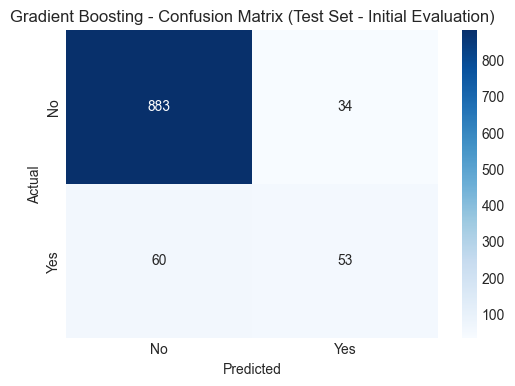


Step 6: Hyperparameter Tuning for Gradient Boosting
Starting GridSearchCV for Gradient Boosting (scoring: roc_auc)...
Fitting 5 folds for each of 18 candidates, totalling 90 fits

Best parameters (Gradient Boosting):
{'classifier__learning_rate': 0.05, 'classifier__max_depth': 4, 'classifier__n_estimators': 100}
Best score (Cross-Validation ROC AUC): 0.9356

Step 7: Final Model Evaluation (On Test Set)
Final Model: GradientBoostingClassifier

Final Model (GradientBoostingClassifier - Tuned) Performance:
  Accuracy: 0.9107
  Precision (Yes): 0.6329
  Recall (Yes): 0.4425
  F1-score (Yes): 0.5208
  ROC AUC: 0.9397

Classification Report (Final Model):
              precision    recall  f1-score   support

      No (0)       0.93      0.97      0.95       917
     Yes (1)       0.63      0.44      0.52       113

    accuracy                           0.91      1030
   macro avg       0.78      0.71      0.74      1030
weighted avg       0.90      0.91      0.90      1030

Plot saved: ou

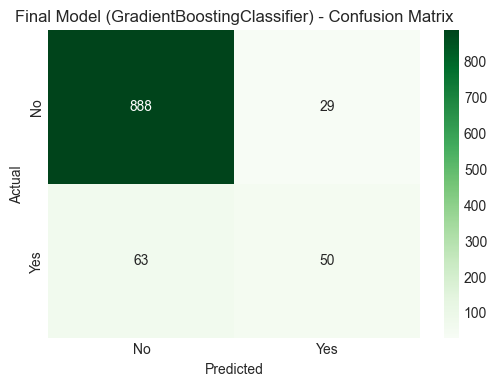

Plot saved: output_plots\05_roc_curve_GradientBoostingClassifier.png


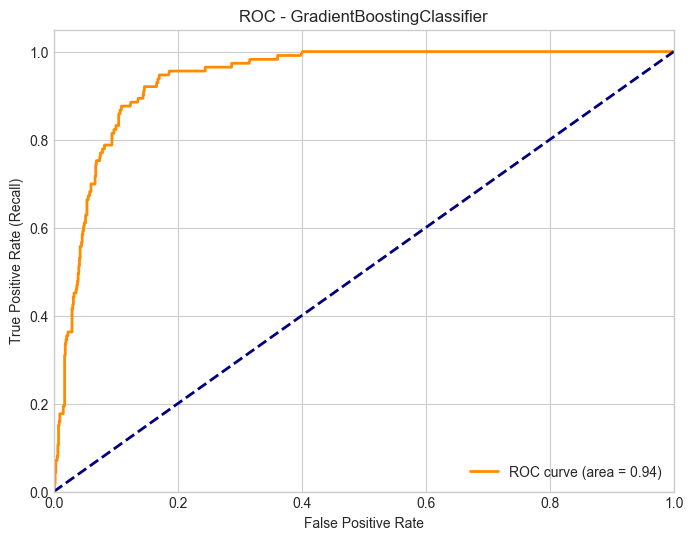

Plot saved: output_plots\06_precision_recall_curve_GradientBoostingClassifier.png


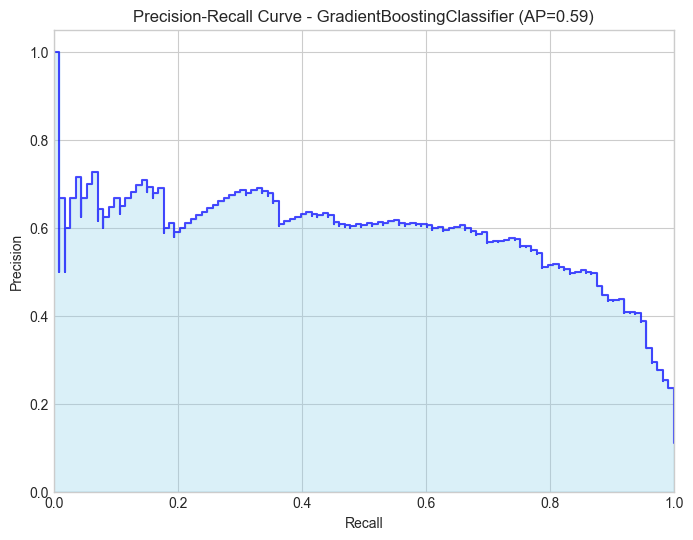


Final model pipeline saved as 'best_model_output.pkl'.
Plot saved: output_plots\07_GradientBoostingClassifier_feature_importances.png


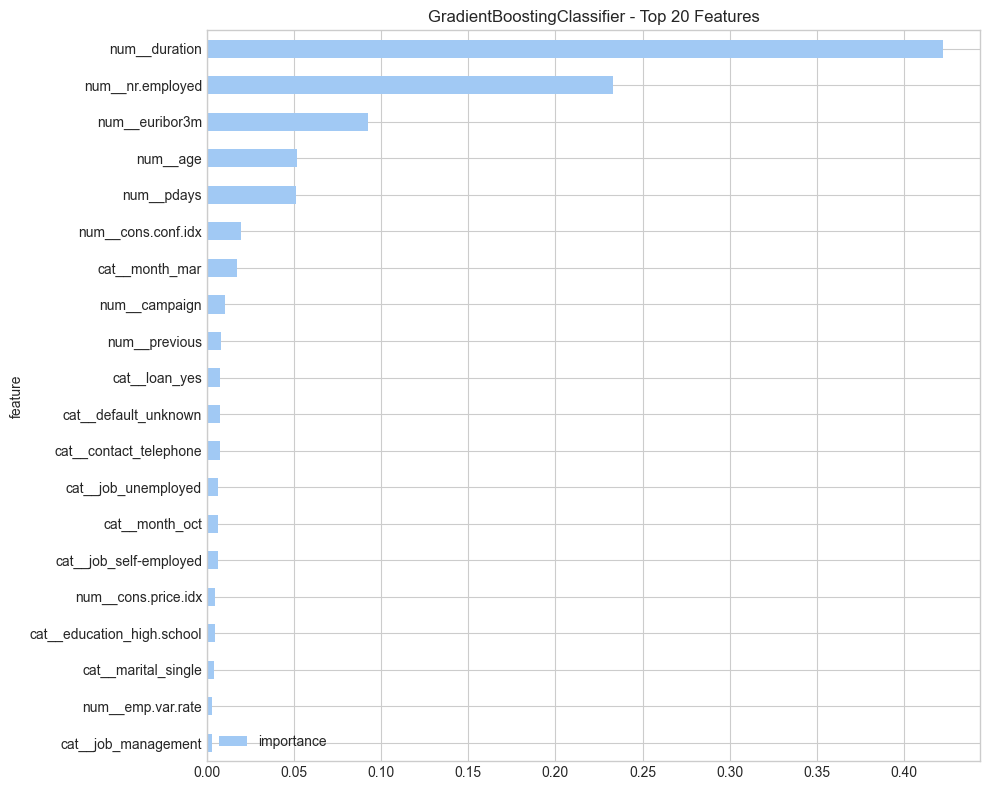


Step 8: Pipeline Creation (Completed)
Final pipeline successfully created, trained, and evaluated.

Step 9: Deployment (Streamlit)
The Streamlit application code below should be saved in a separate 'app.py' file and
run from the terminal with the command 'streamlit run app.py'.
Additionally, the trained model file 'best_model_output.pkl' should also be
in the same directory as 'app.py'.

Streamlit application template saved as 'app.py'.
You can rename this file to 'app.py' and run it.


Project script completed.
Please ensure that the 'bank-additional.csv' file is in the same directory as this script.
The best model has been saved as 'best_model_output.pkl'.

--- Script execution finished. Output logged to script_output.txt ---
--- Plots saved in 'output_plots' directory. ---
Script output has been successfully saved to: d:\Anıl\Okul\Bölüm\3. Sınıf 2. Dönem\ADA442\ProjectADA442\gemini\script_output.txt
All plots have been saved to the directory: d:\Anıl\Okul\Bölüm\3. Sınıf 2. Dönem\AD

In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve, precision_recall_curve, average_precision_score
from sklearn.feature_selection import SelectKBest, f_classif
import joblib
import warnings
import os
import sys

# --- Helper class to tee output to multiple streams ---
class Tee:
    def __init__(self, *files):
        self.files = files
    def write(self, obj):
        for f in self.files:
            f.write(obj)
            f.flush()  # Ensure output is written immediately
    def flush(self):
        for f in self.files:
            f.flush()

# --- Setup for output redirection and plot saving ---
output_log_file = "script_output.txt"
plots_dir = "output_plots"

# Create plots directory if it doesn't exist
os.makedirs(plots_dir, exist_ok=True)

# Redirect stdout to a log file and console
original_stdout = sys.stdout
log_file_handle = open(output_log_file, 'w', encoding='utf-8')
tee_output = Tee(original_stdout, log_file_handle)
sys.stdout = tee_output

print(f"--- Script execution started. Output is being logged to {output_log_file} and console ---")
print(f"--- Plots will be saved in the '{plots_dir}' directory ---")
# --- End of setup ---

warnings.filterwarnings('ignore')

# Visualization settings
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("pastel")

#--------------------------------------------------------------------------
# 1. DATA LOADING AND INITIAL INSPECTION
#--------------------------------------------------------------------------
print("Step 1: Data Loading and Initial Inspection")
file_path = 'bank-additional.csv'
data = pd.DataFrame()
X = pd.DataFrame() # Let's initialize X here

try:
    data = pd.read_csv(file_path, sep=';')
    print(f"'{file_path}' loaded successfully.")
except FileNotFoundError:
    print(f"ERROR: '{file_path}' file not found.")
    print("Please download the 'bank-additional.csv' file from the UCI Bank Marketing dataset page,")
    print("unzip the file, and copy 'bank-additional.csv' to the same directory as this script.")
    # --- Restore stdout before exiting ---
    sys.stdout = original_stdout # Restore original stdout
    if log_file_handle:
        log_file_handle.close()
    # This print will now only go to the console
    print(f"\nScript output up to error saved to {os.path.abspath(output_log_file)}") 
    exit() # Exit if data cannot be loaded
except Exception as e:
    print(f"A general error occurred while loading data: {e}")
    # --- Restore stdout before exiting ---
    sys.stdout = original_stdout # Restore original stdout
    if log_file_handle:
        log_file_handle.close()
    # This print will now only go to the console
    print(f"\nScript output up to error saved to {os.path.abspath(output_log_file)}")
    exit() # Exit if data cannot be loaded

if not data.empty:
    print("First 5 rows of the dataset:")
    print(data.head())
    print("\nDataset information:")
    data.info()
    print("\nDataset shape:", data.shape)
    if data.shape[0] != 4119 or data.shape[1] != 21:
        print(f"WARNING: The shape of the loaded dataset ({data.shape}) is different from the expected shape (4119, 21) for 'bank-additional.csv'. This is normal if you are using 'bank-additional-full.csv' (41188, 21).")

    print("\nTarget variable (y) distribution:")
    print(data['y'].value_counts(normalize=True) * 100)
    sns.countplot(x='y', data=data)
    plt.title('Target Variable Distribution (y)')
    plot_filename_01 = os.path.join(plots_dir, "01_target_variable_distribution.png")
    plt.savefig(plot_filename_01)
    print(f"Plot saved: {plot_filename_01}")
    plt.show()
else:
    print("Analysis cannot continue as data could not be loaded.")
    # --- Restore stdout before exiting ---
    sys.stdout = original_stdout # Restore original stdout
    if log_file_handle:
        log_file_handle.close()
    # This print will now only go to the console
    print(f"\nScript output up to error saved to {os.path.abspath(output_log_file)}")
    exit()

#--------------------------------------------------------------------------
# 2. DATA CLEANING AND EXPLORATORY DATA ANALYSIS (EDA)
#--------------------------------------------------------------------------
print("\nStep 2: Data Cleaning and Exploratory Data Analysis")

print("\nMissing data counts (as NaN):")
print(data.isnull().sum())

print("\nCategorical columns containing 'unknown' and their ratios:")
for col in data.select_dtypes(include='object').columns:
    if 'unknown' in data[col].unique():
        unknown_count = data[col][data[col] == 'unknown'].count()
        unknown_percentage = (unknown_count / len(data)) * 100
        print(f"Column: {col}, Unknown Count: {unknown_count}, Ratio: {unknown_percentage:.2f}%")

if 'duration' in data.columns:
    print("\nWARNING: The 'duration' column might cause data leakage. Check PDF requirements for model accuracy.")

numerical_cols = data.select_dtypes(include=np.number).columns.tolist()
if 'y' in data.columns and 'y' in numerical_cols: numerical_cols.remove('y')

if numerical_cols:
    plt.figure(figsize=(15, max(5, len(numerical_cols) * 0.7)))
    for i, col in enumerate(numerical_cols):
        plt.subplot((len(numerical_cols) + 3) // 4, 4, i + 1)
        sns.boxplot(y=data[col])
        plt.title(col)
    plt.tight_layout()
    plot_filename_02 = os.path.join(plots_dir, "02_numerical_features_boxplots.png")
    plt.savefig(plot_filename_02)
    print(f"Plot saved: {plot_filename_02}")
    plt.show()
else:
    print("No numerical columns found to plot boxplots.")

if 'y' in data.columns:
    data['y'] = data['y'].map({'no': 0, 'yes': 1})
    print("\nTarget variable 'y' converted to numerical form (0: no, 1: yes).")
else:
    print("WARNING: Target variable 'y' not found. This could be an issue.")
    # --- Restore stdout before exiting ---
    sys.stdout = original_stdout # Restore original stdout
    if log_file_handle:
        log_file_handle.close()
    # This print will now only go to the console
    print(f"\nScript output up to error saved to {os.path.abspath(output_log_file)}")
    exit()

#--------------------------------------------------------------------------
# 3. DATA PREPROCESSING
#--------------------------------------------------------------------------
print("\nStep 3: Data Preprocessing")

X = data.drop('y', axis=1)
y = data['y']

categorical_features = X.select_dtypes(include='object').columns.tolist()
numerical_features = X.select_dtypes(include=np.number).columns.tolist()

print(f"\nCategorical features ({len(categorical_features)}): {categorical_features}")
print(f"Numerical features ({len(numerical_features)}): {numerical_features}")

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', drop='first', sparse_output=False), categorical_features)
    ],
    remainder='passthrough'
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)
print(f"\nTraining set size: {X_train.shape}, Test set size: {X_test.shape}")

feature_names_out = []
try:
    X_train_transformed_temp = preprocessor.fit_transform(X_train)
    feature_names_out = preprocessor.get_feature_names_out()
    print(f"\nNumber of features after preprocessing: {len(feature_names_out)}")
except Exception as e:
    print(f"An issue occurred while getting feature names: {e}")


#--------------------------------------------------------------------------
# 4. FEATURE ENGINEERING AND SELECTION
#--------------------------------------------------------------------------
print("\nStep 4: Feature Engineering and Selection")
print("Reviewing model training methods: Balanced class weights, stratified cross-validation, hyperparameter tuning, and various metrics will be used.")
print("If there are specific requirements in the PDF (e.g., 'duration' column, custom feature engineering), they should be implemented in the relevant parts of the code.")

#--------------------------------------------------------------------------
# 5. MODEL SELECTION AND COMPARISON
#--------------------------------------------------------------------------
print("\nStep 5: Model Selection and Comparison")
models = {
    "Logistic Regression": LogisticRegression(solver='liblinear', random_state=42, class_weight='balanced'),
    "Random Forest": RandomForestClassifier(random_state=42, class_weight='balanced_subsample'),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42, n_estimators=100),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42, class_weight='balanced'),
    "Support Vector Machine (Linear)": SVC(kernel='linear', probability=True, random_state=42, class_weight='balanced'),
}

results = {}
trained_pipelines = {}
cv_stratified = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
best_model_name_initial = None

for model_name, model in models.items():
    print(f"\nTraining {model_name}...")
    current_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    try:
        current_pipeline.fit(X_train, y_train)
        y_pred_train = current_pipeline.predict(X_train)
        y_pred_test = current_pipeline.predict(X_test)
        roc_auc_test = 0.0
        if hasattr(current_pipeline.named_steps['classifier'], "predict_proba"):
            y_proba_test = current_pipeline.predict_proba(X_test)[:, 1]
            roc_auc_test = roc_auc_score(y_test, y_proba_test)
        else:
            print(f"WARNING: predict_proba method not found for {model_name}. ROC AUC set to 0.0.")
        results[model_name] = {
            "Accuracy (Train)": accuracy_score(y_train, y_pred_train),
            "Accuracy (Test)": accuracy_score(y_test, y_pred_test),
            "Precision (Test)": precision_score(y_test, y_pred_test, zero_division=0),
            "Recall (Test)": recall_score(y_test, y_pred_test, zero_division=0),
            "F1-score (Test)": f1_score(y_test, y_pred_test, zero_division=0),
            "ROC AUC (Test)": roc_auc_test
        }
        trained_pipelines[model_name] = current_pipeline
        print(f"{model_name} Performance:")
        for metric, value in results[model_name].items(): print(f"  {metric}: {value:.4f}")
        print("-" * 50)
    except Exception as e:
        print(f"Error occurred while training/evaluating {model_name}: {e}")
        results[model_name] = {key: 0 for key in ["Accuracy (Train)", "Accuracy (Test)", "Precision (Test)", "Recall (Test)", "F1-score (Test)", "ROC AUC (Test)"]}

if results:
    results_df = pd.DataFrame(results).T.sort_values(by="ROC AUC (Test)", ascending=False)
    print("\nComparative Performance of All Models (Test Set - Sorted by ROC AUC):")
    print(results_df)
    if not results_df.empty:
        best_model_name_initial = results_df.index[0]
        best_pipeline_initial = trained_pipelines[best_model_name_initial]
        print(f"\nBest model based on initial evaluation (ROC AUC): {best_model_name_initial}")
        y_pred_best_initial = best_pipeline_initial.predict(X_test)
        cm_initial = confusion_matrix(y_test, y_pred_best_initial)
        plt.figure(figsize=(6,4))
        sns.heatmap(cm_initial, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
        plt.xlabel('Predicted'); plt.ylabel('Actual')
        plt.title(f'{best_model_name_initial} - Confusion Matrix (Test Set - Initial Evaluation)')
        plot_filename_03 = os.path.join(plots_dir, f"03_{best_model_name_initial.replace(' ', '_')}_confusion_matrix_initial.png")
        plt.savefig(plot_filename_03)
        print(f"Plot saved: {plot_filename_03}")
        plt.show()
else:
    print("No model could be successfully trained or evaluated.")

#--------------------------------------------------------------------------
# 6. HYPERPARAMETER TUNING
#--------------------------------------------------------------------------
final_model_pipeline = None
model_filename = 'best_model_output.pkl' # Default filename

if best_model_name_initial:
    print(f"\nStep 6: Hyperparameter Tuning for {best_model_name_initial}")
    pipeline_for_tuning = trained_pipelines[best_model_name_initial]
    param_grid = {}
    if best_model_name_initial == "Logistic Regression":
        param_grid = {'classifier__C': [0.01, 0.1, 1, 10, 100], 'classifier__penalty': ['l1', 'l2']}
    elif best_model_name_initial == "Random Forest":
        param_grid = {'classifier__n_estimators': [100, 200], 'classifier__max_depth': [10, 20, None], 'classifier__min_samples_split': [2, 5], 'classifier__min_samples_leaf': [1, 2]}
    elif best_model_name_initial == "Gradient Boosting":
        param_grid = {'classifier__n_estimators': [100, 200], 'classifier__learning_rate': [0.01, 0.05, 0.1], 'classifier__max_depth': [3, 4, 5]}
    elif best_model_name_initial == "K-Nearest Neighbors":
         param_grid = {'classifier__n_neighbors': [3, 5, 7, 9, 11], 'classifier__weights': ['uniform', 'distance'], 'classifier__metric': ['euclidean', 'manhattan', 'minkowski']}
    elif best_model_name_initial == "Decision Tree":
        param_grid = {'classifier__criterion': ['gini', 'entropy'], 'classifier__max_depth': [5, 10, 20, None], 'classifier__min_samples_split': [2, 5, 10], 'classifier__min_samples_leaf': [1, 2, 4]}
    elif best_model_name_initial == "Support Vector Machine (Linear)":
        param_grid = {'classifier__C': [0.1, 1, 10]}

    if param_grid:
        grid_search = GridSearchCV(estimator=pipeline_for_tuning, param_grid=param_grid, cv=cv_stratified, scoring='roc_auc', verbose=2, n_jobs=-1)
        print(f"Starting GridSearchCV for {best_model_name_initial} (scoring: roc_auc)...")
        grid_search.fit(X_train, y_train)
        print(f"\nBest parameters ({best_model_name_initial}):"); print(grid_search.best_params_)
        print(f"Best score (Cross-Validation ROC AUC): {grid_search.best_score_:.4f}")
        final_model_pipeline = grid_search.best_estimator_
    else:
        print(f"Hyperparameter grid not defined for {best_model_name_initial}. Initial model will be used.")
        final_model_pipeline = best_pipeline_initial
else:
    print("\nStep 6 (Hyperparameter Tuning) is skipped as the best model could not be determined.")

#--------------------------------------------------------------------------
# 7. FINAL MODEL EVALUATION
#--------------------------------------------------------------------------
if final_model_pipeline:
    print("\nStep 7: Final Model Evaluation (On Test Set)")
    final_model_name = final_model_pipeline.named_steps['classifier'].__class__.__name__
    print(f"Final Model: {final_model_name}")
    y_pred_final_test = final_model_pipeline.predict(X_test)
    roc_auc_final = 0.0
    y_proba_final_test = None
    if hasattr(final_model_pipeline.named_steps['classifier'], "predict_proba"):
        y_proba_final_test = final_model_pipeline.predict_proba(X_test)[:, 1]
        roc_auc_final = roc_auc_score(y_test, y_proba_final_test)
    else:
        print("WARNING: predict_proba method not found for the final model. ROC AUC set to 0.0.")
    print(f"\nFinal Model ({final_model_name} - Tuned) Performance:")
    print(f"  Accuracy: {accuracy_score(y_test, y_pred_final_test):.4f}")
    print(f"  Precision (Yes): {precision_score(y_test, y_pred_final_test, pos_label=1, zero_division=0):.4f}")
    print(f"  Recall (Yes): {recall_score(y_test, y_pred_final_test, pos_label=1, zero_division=0):.4f}")
    print(f"  F1-score (Yes): {f1_score(y_test, y_pred_final_test, pos_label=1, zero_division=0):.4f}")
    print(f"  ROC AUC: {roc_auc_final:.4f}")
    print("\nClassification Report (Final Model):")
    print(classification_report(y_test, y_pred_final_test, target_names=['No (0)', 'Yes (1)'], zero_division=0))
    cm_final = confusion_matrix(y_test, y_pred_final_test)
    plt.figure(figsize=(6,4)); sns.heatmap(cm_final, annot=True, fmt='d', cmap='Greens', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
    plt.xlabel('Predicted'); plt.ylabel('Actual'); plt.title(f'Final Model ({final_model_name}) - Confusion Matrix');
    plot_filename_04 = os.path.join(plots_dir, f"04_final_model_{final_model_name.replace(' ', '_')}_confusion_matrix.png")
    plt.savefig(plot_filename_04)
    print(f"Plot saved: {plot_filename_04}")
    plt.show()

    if y_proba_final_test is not None:
        fpr, tpr, _ = roc_curve(y_test, y_proba_final_test)
        plt.figure(figsize=(8,6)); plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_final:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--'); plt.xlim([0.0, 1.0]); plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate (Recall)'); plt.title(f'ROC - {final_model_name}'); plt.legend(loc="lower right");
        plot_filename_05 = os.path.join(plots_dir, f"05_roc_curve_{final_model_name.replace(' ', '_')}.png")
        plt.savefig(plot_filename_05)
        print(f"Plot saved: {plot_filename_05}")
        plt.show()
        precision_final, recall_final, _ = precision_recall_curve(y_test, y_proba_final_test)
        avg_precision_final = average_precision_score(y_test, y_proba_final_test)
        plt.figure(figsize=(8,6)); plt.step(recall_final, precision_final, color='b', alpha=0.7, where='post')
        plt.fill_between(recall_final, precision_final, step='post', alpha=0.3, color='skyblue')
        plt.xlabel('Recall'); plt.ylabel('Precision'); plt.ylim([0.0, 1.05]); plt.xlim([0.0, 1.0])
        plt.title(f'Precision-Recall Curve - {final_model_name} (AP={avg_precision_final:.2f})');
        plot_filename_06 = os.path.join(plots_dir, f"06_precision_recall_curve_{final_model_name.replace(' ', '_')}.png")
        plt.savefig(plot_filename_06)
        print(f"Plot saved: {plot_filename_06}")
        plt.show()

    joblib.dump(final_model_pipeline, model_filename)
    print(f"\nFinal model pipeline saved as '{model_filename}'.")
    processed_feature_names = None
    try:
        processed_feature_names = final_model_pipeline.named_steps['preprocessor'].get_feature_names_out()
    except Exception as e:
        print(f"Preprocessed feature names could not be retrieved: {e}.")
        
    if processed_feature_names is not None:
        final_classifier_step = final_model_pipeline.named_steps['classifier']
        if hasattr(final_classifier_step, 'feature_importances_'):
            importances = final_classifier_step.feature_importances_
            # Removed color argument
            pd.DataFrame({'feature': processed_feature_names, 'importance': importances}).sort_values('importance', ascending=False).head(20).plot(kind='barh', x='feature', y='importance', figsize=(10,8), title=f'{final_model_name} - Top 20 Features').invert_yaxis(); plt.tight_layout();
            plot_filename_07_imp = os.path.join(plots_dir, f"07_{final_model_name.replace(' ', '_')}_feature_importances.png")
            plt.savefig(plot_filename_07_imp, bbox_inches='tight')
            print(f"Plot saved: {plot_filename_07_imp}")
            plt.show()
        elif hasattr(final_classifier_step, 'coef_'):
            coefficients = final_classifier_step.coef_[0]
            coef_df = pd.DataFrame({'feature': processed_feature_names, 'coefficient': coefficients})
            coef_df['abs_coefficient'] = np.abs(coef_df['coefficient'])
            # Removed color argument
            coef_df.sort_values('abs_coefficient', ascending=False).head(20).sort_values('coefficient', ascending=False).plot(kind='barh', x='feature', y='coefficient', figsize=(10,8), title=f'{final_model_name} - Top 20 Feature Coefficients').invert_yaxis(); plt.tight_layout();
            plot_filename_07_coef = os.path.join(plots_dir, f"07_{final_model_name.replace(' ', '_')}_feature_coefficients.png")
            plt.savefig(plot_filename_07_coef, bbox_inches='tight')
            print(f"Plot saved: {plot_filename_07_coef}")
            plt.show()
else:
    print("\nStep 7 (Final Model Evaluation) is skipped as the final model pipeline is not available.")

#--------------------------------------------------------------------------
# 8. PIPELINE CREATION (Completed)
#--------------------------------------------------------------------------
print("\nStep 8: Pipeline Creation (Completed)")
if final_model_pipeline: print("Final pipeline successfully created, trained, and evaluated.")
else: print("An issue occurred during pipeline creation/evaluation steps, or steps were skipped.")

#--------------------------------------------------------------------------
# 9. DEPLOYMENT (WITH STREAMLIT) - EXAMPLE CODE
#--------------------------------------------------------------------------
original_columns_for_streamlit = []
categorical_options_for_streamlit = {}
numerical_ranges_for_streamlit = {}

if not X.empty:
    original_columns_for_streamlit = X.columns.tolist()
    for col in X.select_dtypes(include='object').columns:
        categorical_options_for_streamlit[col] = sorted(X[col].unique().tolist())
    for col in X.select_dtypes(include=np.number).columns:
        numerical_ranges_for_streamlit[col] = (X[col].min(), X[col].max())
else:
    print("WARNING: 'X' DataFrame is empty for Streamlit. Default/empty values will be used.")
    original_columns_for_streamlit = ['age', 'job', 'duration']
    categorical_options_for_streamlit = {'job': ['admin.', 'unknown']}
    numerical_ranges_for_streamlit = {'age': (18,99), 'duration':(0,1000)}


streamlit_app_code = f"""
import streamlit as st
import pandas as pd
import joblib
import numpy as np

st.set_page_config(layout="wide", page_title="Bank Marketing Prediction App")

@st.cache_resource
def load_model(model_path='best_model_output.pkl'):
    try:
        return joblib.load(model_path)
    except FileNotFoundError:
        st.error(f"Model ('{{model_path}}') not found. Please run the main script.")
        return None
    except Exception as e:
        st.error(f"Error loading model: {{e}}")
        return None

model_pipeline = load_model()

original_columns = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
categorical_options = {{'job': ['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown'], 'marital': ['divorced', 'married', 'single', 'unknown'], 'education': ['basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown'], 'default': ['no', 'unknown', 'yes'], 'housing': ['no', 'unknown', 'yes'], 'loan': ['no', 'unknown', 'yes'], 'contact': ['cellular', 'telephone'], 'month': ['apr', 'aug', 'dec', 'jul', 'jun', 'mar', 'may', 'nov', 'oct', 'sep'], 'day_of_week': ['fri', 'mon', 'thu', 'tue', 'wed'], 'poutcome': ['failure', 'nonexistent', 'success']}}
numerical_ranges = {{'age': (np.int64(18), np.int64(88)), 'duration': (np.int64(0), np.int64(3643)), 'campaign': (np.int64(1), np.int64(35)), 'pdays': (np.int64(0), np.int64(999)), 'previous': (np.int64(0), np.int64(6)), 'emp.var.rate': (np.float64(-3.4), np.float64(1.4)), 'cons.price.idx': (np.float64(92.201), np.float64(94.767)), 'cons.conf.idx': (np.float64(-50.8), np.float64(-26.9)), 'euribor3m': (np.float64(0.635), np.float64(5.045)), 'nr.employed': (np.float64(4963.6), np.float64(5228.1))}}

st.title("🏦 Bank Term Deposit Subscription Prediction App")
st.markdown("Predicts whether a customer will subscribe to a term deposit product.")
st.markdown("---")

def get_user_input_sidebar():
    inputs = {{}}
    st.sidebar.header("Enter Customer Information")

    expander_sections = {{
        "Personal Information": ['age', 'job', 'marital', 'education'],
        "Credit & Contact": ['default', 'housing', 'loan', 'contact', 'month', 'day_of_week'],
        "Campaign Information": ['duration', 'campaign', 'pdays', 'previous', 'poutcome'],
        "Economic Indicators": ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
    }}

    for section, cols in expander_sections.items():
        with st.sidebar.expander(section, expanded=(section=="Personal Information")):
            for col_name in cols:
                if col_name in original_columns:
                    if col_name in categorical_options:
                        options = categorical_options.get(col_name, ['unknown'])
                        if not options: options = ['unknown'] 
                        inputs[col_name] = st.selectbox(f"{{col_name.replace('_',' ').title()}}", options=options, index=0)

                    elif col_name in numerical_ranges:
                        min_val, max_val = numerical_ranges.get(col_name, (0,100))
                        default_val = (float(min_val) + float(max_val)) / 2.0
                        step_val = 1.0
                        if isinstance(min_val, float) or isinstance(max_val, float):
                            range_diff = float(max_val) - float(min_val)
                            if range_diff > 0:
                                if range_diff < 1: step_val = 0.01
                                elif range_diff < 20: step_val = 0.1

                        current_value = float(default_val)

                        if col_name == 'age' or col_name == 'campaign' or col_name == 'pdays' or col_name == 'previous' : 
                             inputs[col_name] = st.number_input(f"{{col_name.replace('_',' ').title()}}", 
                                                             min_value=int(round(min_val)), max_value=int(round(max_val)), 
                                                             value=int(round(current_value)), step=1)
                        elif isinstance(min_val, float) or isinstance(max_val, float) or (max_val - min_val < 30 and max_val != min_val): 
                             inputs[col_name] = st.slider(f"{{col_name.replace('_',' ').title()}}", 
                                                         min_value=float(min_val), max_value=float(max_val), 
                                                         value=current_value, step=step_val)
                        else: 
                            inputs[col_name] = st.number_input(f"{{col_name.replace('_',' ').title()}}", 
                                                            min_value=float(min_val), max_value=float(max_val), 
                                                            value=current_value, step=step_val if step_val > 0 else 0.1)

    final_input_data = {{}}
    for col in original_columns:
        final_input_data[col] = inputs.get(col) 

    input_df = pd.DataFrame([final_input_data])
    input_df = input_df[original_columns] 
    return input_df

if model_pipeline:

    user_input_df = get_user_input_sidebar()

    st.subheader("Entered Customer Information:")
    if not user_input_df.empty:
        display_df = user_input_df.copy().astype(str)
        st.dataframe(display_df)

    if st.sidebar.button("🔮 Predict", type="primary", use_container_width=True):
        if user_input_df.isnull().values.any():
            st.sidebar.error("Please fill in all fields. There are missing values.")
        else:
            try:
                prediction = model_pipeline.predict(user_input_df)
                prediction_proba = model_pipeline.predict_proba(user_input_df)
                st.markdown("---"); st.subheader("✨ Prediction Result ✨")
                col1_res, col2_res = st.columns(2)
                with col1_res:
                    if prediction[0] == 1: st.success("Customer is **EXPECTED TO SUBSCRIBE**.", icon="✅")
                    else: st.error("Customer is **NOT EXPECTED TO SUBSCRIBE**.", icon="❌")
                with col2_res:
                    proba_yes = prediction_proba[0][1]
                    st.metric(label="Subscription Probability (Yes)", value=f"{{proba_yes*100:.2f}}%")
                    st.progress(float(proba_yes))

                import altair as alt
                proba_data = pd.DataFrame({{'Status': ['No', 'Yes'], 'Probability': prediction_proba[0]}})
                chart = alt.Chart(proba_data).mark_bar().encode(
                    x=alt.X('Probability:Q', axis=alt.Axis(format='%')), y=alt.Y('Status:N', sort=None),
                    color=alt.Color('Status:N', legend=None, scale=alt.Scale(domain=['Yes', 'No'], range=['#2ECC71', '#E74C3C']))
                ).properties(title='Prediction Probabilities')
                st.altair_chart(chart, use_container_width=True)
            except Exception as e:
                st.error(f"Prediction error: {{e}}")
    else:
        st.info("Enter the information in the left panel and click 'Predict' for a prediction.")
else:
    st.error(f"Model ('best_model_output.pkl') could not be loaded. Please run the main script.")

st.sidebar.markdown("---")
st.sidebar.markdown("##### ADA442 Project")
st.sidebar.markdown("- Anıl Metin")
st.sidebar.markdown("- Salih Melih Bağ")
st.sidebar.markdown("- İrem Şimşek")
st.sidebar.markdown("- Merve Nair")

st.markdown("---")
"""

print("\nStep 9: Deployment (Streamlit)")
print("The Streamlit application code below should be saved in a separate 'app.py' file and")
print("run from the terminal with the command 'streamlit run app.py'.")
print(f"Additionally, the trained model file '{model_filename}' should also be")
print("in the same directory as 'app.py'.")

try:
    if X.empty:
        print("\nWARNING: 'X' DataFrame is empty while creating the Streamlit template. The template might be created with missing information.")

    with open("app.py", "w", encoding="utf-8") as f:
        f.write(streamlit_app_code)
    print("\nStreamlit application template saved as 'app.py'.")
    print("You can rename this file to 'app.py' and run it.")
except Exception as e:
    print(f"\nStreamlit template could not be written to file: {e}")


print("\n\nProject script completed.")
print(f"Please ensure that the '{file_path}' file is in the same directory as this script.")
print(f"The best model has been saved as '{model_filename}'.")

# --- Restore stdout and close log file ---
# These prints will go to both console and file via Tee
print(f"\n--- Script execution finished. Output logged to {output_log_file} ---")
print(f"--- Plots saved in '{plots_dir}' directory. ---")

sys.stdout = original_stdout # Restore original stdout
if log_file_handle:
    log_file_handle.close()

# Final confirmation messages to notebook output (console only)
print(f"Script output has been successfully saved to: {os.path.abspath(output_log_file)}")
print(f"All plots have been saved to the directory: {os.path.abspath(plots_dir)}")